# Comparison between patients who received thrombolysis versus not

## Aims

Compares feature means for patients who receive thrombolysis against those who did not.

This analysis is only for patients arriving within 4 hours of known stroke onset.

First section replicate SAMueL-1 analysis [available to view here](https://samuel-book.github.io/samuel-1/descriptive_stats/05_thrombolysis_comparison.html).

Second section is additional to SAMueL-1, investigating each relationship visually, and often looking more at distribution of results

## Set up

In [1]:
# Import packages and functions
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Display entire dataframes
pd.set_option("display.max_rows", 999, "display.max_columns", 150)

# Linting
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Set paths and filenames
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and files.'''

    data_path = './../output/'
    data_filename = 'reformatted_data.csv'


paths = Paths()

In [3]:
# Load data
data = pd.read_csv(os.path.join(paths.data_path,
                                paths.data_filename))

## Reformat dataset

* Keep columns of interest to the analysis.
* Add columns to enable comparison to SAMueL-1

In [4]:
# Drop ID
relevant_data = data.drop(
    ['id'] + [col for col in data if col.startswith('thrombolysis_no')],
    axis=1)

# Add categorical arrival times
for time in np.sort(data['arrival_time_3_hour_period'].unique()):
    col = f'arrive_{time}_to_{time+3}'
    relevant_data[col] = np.where(
        relevant_data['arrival_time_3_hour_period'] == time, 1, 0)

# Add descriptive thrombolysis column
data['thrombolysis_str'] = data['thrombolysis'].map({0: 'No', 1: 'Yes'})

## Describe entire dataset

In [5]:
all = relevant_data.describe().T
all

,count,mean,std,min,25%,50%,75%,max
age,137019.0,74.509028,13.410804,37.5,67.5,77.5,82.5,92.5
male,137019.0,0.527715,0.499233,0.0,0.0,1.0,1.0,1.0
infarction,137019.0,0.853787,0.353321,0.0,1.0,1.0,1.0,1.0
onset_to_arrival_time,137019.0,113.816040,52.959625,1.0,73.0,104.0,150.0,240.0
onset_known,137019.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
precise_onset_known,137019.0,0.631168,0.482490,0.0,0.0,1.0,1.0,1.0
onset_during_sleep,137019.0,0.047015,0.211673,0.0,0.0,0.0,0.0,1.0
arrive_by_ambulance,137012.0,0.903855,0.294791,0.0,1.0,1.0,1.0,1.0
call_to_ambulance_arrival_time,37867.0,24.444186,25.874987,1.0,11.0,18.0,30.0,1395.0
ambulance_on_scene_time,37867.0,30.873267,14.250929,1.0,21.0,28.0,37.0,183.0


## Describe thrombolysed patients

In [6]:
ivt = relevant_data[relevant_data['thrombolysis'] == 1].describe().T
ivt

,count,mean,std,min,25%,50%,75%,max
age,40055.0,72.374672,13.553829,37.5,62.5,72.5,82.5,92.5
male,40055.0,0.556035,0.496856,0.0,0.0,1.0,1.0,1.0
infarction,40055.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
onset_to_arrival_time,40055.0,99.305155,46.214023,1.0,65.0,90.0,125.0,240.0
onset_known,40055.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
precise_onset_known,40055.0,0.818475,0.385458,0.0,1.0,1.0,1.0,1.0
onset_during_sleep,40055.0,0.005992,0.077175,0.0,0.0,0.0,0.0,1.0
arrive_by_ambulance,40053.0,0.924500,0.264200,0.0,1.0,1.0,1.0,1.0
call_to_ambulance_arrival_time,11181.0,22.698685,21.413365,1.0,11.0,17.0,28.0,940.0
ambulance_on_scene_time,11181.0,27.369913,12.120482,1.0,19.0,25.0,33.0,142.0


## Describe non-thrombolysed patients

In [7]:
no_ivt = relevant_data[relevant_data['thrombolysis'] == 0].describe().T
no_ivt

,count,mean,std,min,25%,50%,75%,max
age,96964.0,75.390712,13.251384,37.5,67.5,77.5,87.5,92.5
male,96964.0,0.516016,0.499746,0.0,0.0,1.0,1.0,1.0
infarction,96964.0,0.793387,0.404877,0.0,1.0,1.0,1.0,1.0
onset_to_arrival_time,96964.0,119.810363,54.389181,1.0,77.0,110.0,159.0,240.0
onset_known,96964.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
precise_onset_known,96964.0,0.553793,0.497100,0.0,0.0,1.0,1.0,1.0
onset_during_sleep,96964.0,0.063962,0.244686,0.0,0.0,0.0,0.0,1.0
arrive_by_ambulance,96959.0,0.895327,0.306133,0.0,1.0,1.0,1.0,1.0
call_to_ambulance_arrival_time,26686.0,25.175523,27.497678,1.0,11.0,18.0,31.0,1395.0
ambulance_on_scene_time,26686.0,32.341115,14.810058,1.0,22.0,30.0,39.0,183.0


## Describe all three groups

In [8]:
summary = pd.DataFrame(
    {'all': all['mean'],
     'thrombolysed': ivt['mean'],
     'non_thrombolysed': no_ivt['mean']})
summary['ratio'] = summary['thrombolysed'] / summary['non_thrombolysed']
round(summary, 2)

,all,thrombolysed,non_thrombolysed,ratio
age,74.51,72.37,75.39,0.96
male,0.53,0.56,0.52,1.08
infarction,0.85,1.00,0.79,1.26
onset_to_arrival_time,113.82,99.31,119.81,0.83
onset_known,1.00,1.00,1.00,1.00
precise_onset_known,0.63,0.82,0.55,1.48
onset_during_sleep,0.05,0.01,0.06,0.09
arrive_by_ambulance,0.90,0.92,0.90,1.03
call_to_ambulance_arrival_time,24.44,22.70,25.18,0.90
ambulance_on_scene_time,30.87,27.37,32.34,0.85


## Observations

In [9]:
# Extract metrics
ivt_ischaemic = summary.loc['thrombolysis', 'thrombolysed']*100
ivt_pih = 100 - ivt_ischaemic
ivt_sleep = summary.loc['onset_during_sleep', 'thrombolysed']*100
non_sleep = summary.loc['onset_during_sleep', 'non_thrombolysed']*100
ivt_age = summary.loc['age', 'thrombolysed']
non_age = summary.loc['age', 'non_thrombolysed']
ivt_arr = summary.loc['onset_to_arrival_time', 'thrombolysed']
non_arr = summary.loc['onset_to_arrival_time', 'non_thrombolysed']
ivt_3_6 = summary.loc['arrive_3_to_6', 'thrombolysed']*100
non_3_6 = summary.loc['arrive_3_to_6', 'non_thrombolysed']*100
ivt_sev = summary.loc['stroke_severity', 'thrombolysed']
non_sev = summary.loc['stroke_severity', 'non_thrombolysed']
ivt_sca = summary.loc['arrival_to_scan_time', 'thrombolysed']
non_sca = summary.loc['arrival_to_scan_time', 'non_thrombolysed']
ivt_pre = summary.loc['precise_onset_known', 'thrombolysed']*100
non_pre = summary.loc['precise_onset_known', 'non_thrombolysed']*100
ivt_amb = summary.loc['arrive_by_ambulance', 'thrombolysed']*100
non_amb = summary.loc['arrive_by_ambulance', 'non_thrombolysed']*100
ivt_fib = summary.loc['atrial_fibrillation', 'thrombolysed']*100
non_fib = summary.loc['atrial_fibrillation', 'non_thrombolysed']*100
ivt_fib = summary.loc['atrial_fibrillation', 'thrombolysed']*100
non_fib = summary.loc['atrial_fibrillation', 'non_thrombolysed']*100
ivt_pri = summary.loc['prior_stroke_tia', 'thrombolysed']*100
non_pri = summary.loc['prior_stroke_tia', 'non_thrombolysed']*100
ivt_coa = summary.loc['afib_anticoagulant', 'thrombolysed']*100
non_coa = summary.loc['afib_anticoagulant', 'non_thrombolysed']*100

# Print observations
print(f'''
For patients arriving within 4 hours of known stroke onset, compared
with those who don't receive thrombolysis, patients who receive thrombolysis -
* {ivt_ischaemic:.2f}% had iscahemic stroke (and so {ivt_pih:.2f}% had PIH)
* {ivt_sleep:.2f}% had onset during sleep '''
      f'''(compared to {non_sleep:.2f}% non-thrombolysed)
* Younger mean age ({ivt_age:.2f} v.s. {non_age:.2f})
* Less likely to arrive at 3 to 6am ({ivt_3_6:.2f}% v.s. {non_3_6:.2f}%)
* Shorter onset to arrival time ({ivt_arr:.2f}m v.s. {non_arr:.2f}m)
* Higher stroke severity (NIHSS score {ivt_sev:.2f} v.s. {non_sev:.2f})
* Shorter mean arrival to scan time ({ivt_sca:.2f}m v.s. {non_sca:.2f}m)
* More likely precise onset time ({ivt_pre:.2f}% v.s. {non_pre:.2f}%)
* Arrive by ambulance ({ivt_amb:.2f}% v.s. {non_amb:.2f}%)
* Don't have atrial firbillation ({ivt_fib:.2f}% v.s. {non_fib:.2f}%)
* Don't have history of stroke or TIA ({ivt_pri:.2f}% v.s. {non_pri:.2f}%)
* Not on anticoagulant ({ivt_coa:.2f}% v.s. {non_coa:.2f}%)
''')


For patients arriving within 4 hours of known stroke onset, compared
with those who don't receive thrombolysis, patients who receive thrombolysis -
* 100.00% had iscahemic stroke (and so 0.00% had PIH)
* 0.60% had onset during sleep (compared to 6.40% non-thrombolysed)
* Younger mean age (72.37 v.s. 75.39)
* Less likely to arrive at 3 to 6am (1.82% v.s. 3.25%)
* Shorter onset to arrival time (99.31m v.s. 119.81m)
* Higher stroke severity (NIHSS score 10.98 v.s. 8.07)
* Shorter mean arrival to scan time (23.12m v.s. 130.57m)
* More likely precise onset time (81.85% v.s. 55.38%)
* Arrive by ambulance (92.45% v.s. 89.53%)
* Don't have atrial firbillation (11.94% v.s. 23.47%)
* Don't have history of stroke or TIA (20.30% v.s. 29.27%)
* Not on anticoagulant (4.47% v.s. 23.82%)



## Additional analysis

The above follows the analysis performed for SAMueL-1. Below is additional, more visual analyses to support this.

In [10]:
def plot_by_thrombolysis(kind, column, label,
                         bins=False, max=False, mean=False):
    '''
    Plots results for the specified column by whether patients were
    thrombolysed.
    Inputs:
    kind- string, either 'line', 'bar_mean', or 'bar_percent'
    column - string, name of column
    label - string, label for y-axis of bar plot or x-axis of line plot
    bins - optional, default False, can provide integer to create bins
    max - optional, can provide integer to cut off results
    mean- optional, if true, will calculate and display mean for line plot
    '''
    # Bar plot
    if kind.startswith('bar'):

        # Find mean or proportion
        res = data.groupby('thrombolysis_str')[column].mean()

        # If proportion, multiple by 100 to get percentage
        if kind == 'bar_percent':
            res = res*100

        # Display result
        display(res)

        # Create bar plot
        fig, ax = plt.subplots(figsize=(5, 5))
        res.plot(kind='bar', ax=ax, color=['#6890F0', '#fdaa48'])
        ax.set_xlabel('Thrombolysis')
        ax.set_ylabel(label)
        plt.xticks(rotation=0)
        plt.show()

    # Line plot
    elif kind == 'line':

        # Display mean
        if mean:
            display(data.groupby('thrombolysis_str')[column].mean())

        if bins is not False:
            # Break column into bins by amount specified
            # Do this rather than histogram as lines easier to compare  groups
            bins = np.arange(0, data[column].max()+bins, bins)
            data[column + '_bin'] = pd.cut(
                data[column], bins, include_lowest=True, labels=bins[:-1])
            column = column + '_bin'

        # Find proportions when grouped by whether thrombolysed
        group = (data
                 .groupby('thrombolysis_str')[column]
                 .value_counts(normalize=True)
                 .reset_index(name='prop'))

        # Pivot so can plot
        res = group.pivot(index=column,
                          columns='thrombolysis_str',
                          values='prop')*100

        # Create grouped line plot
        fig, ax = plt.subplots(figsize=(5, 5))
        if max is False:
            res.plot(marker='.', ax=ax)
        elif max is not False:
            res[res.index <= max].plot(marker='.', ax=ax)
        ax.set_xlabel(label)
        ax.set_ylabel('Percentage (%)')
        ax.legend(title='Thrombolysis')
        ax.grid()
        plt.show()

**Age** - on average, thrombolysed patients are younger than non-thrombolysed.

thrombolysis_str
No     75.390712
Yes    72.374672
Name: age, dtype: float64

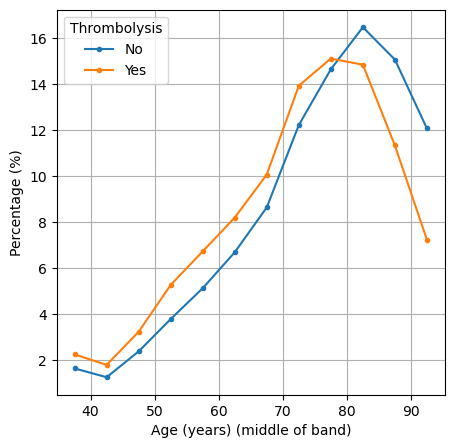

In [11]:
plot_by_thrombolysis(kind='line',
                     column='age',
                     label='Age (years) (middle of band)',
                     mean=True)

**Gender** - higher proportion of thrombolysed patients are male.

thrombolysis_str
No     51.601625
Yes    55.603545
Name: male, dtype: float64

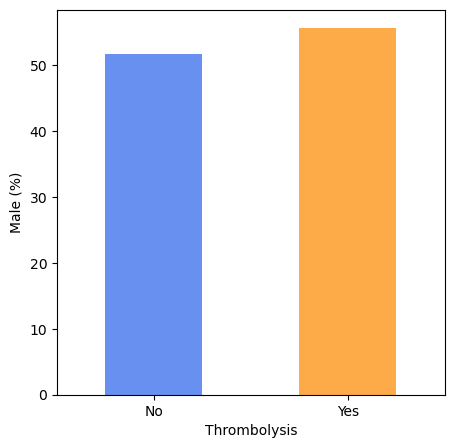

In [12]:
plot_by_thrombolysis(kind='bar_percent',
                     column='male',
                     label='Male (%)')

**Infarction** - all thrombolysed patients had infarction and none had PIH.

thrombolysis_str
No      79.338724
Yes    100.000000
Name: infarction, dtype: float64

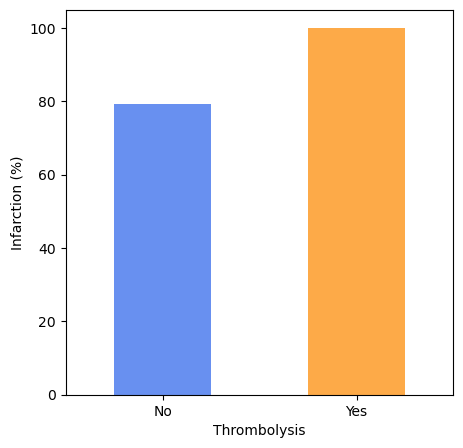

In [13]:
plot_by_thrombolysis(kind='bar_percent',
                     column='infarction',
                     label='Infarction (%)')

**Onset to arrival time** - thrombolysed patients had a lower mean onset to arrival time

thrombolysis_str
No     119.810363
Yes     99.305155
Name: onset_to_arrival_time, dtype: float64

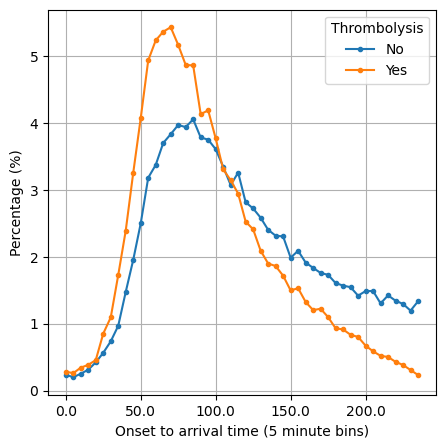

In [14]:
plot_by_thrombolysis(kind='line',
                     column='onset_to_arrival_time',
                     label='Onset to arrival time (5 minute bins)',
                     bins=5,
                     mean=True)

**Precise onset known** - higher proportion of thrombolysed patients have precise onset known.

thrombolysis_str
No     55.379316
Yes    81.847460
Name: precise_onset_known, dtype: float64

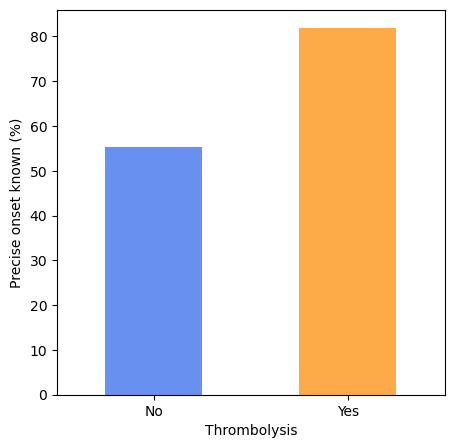

In [15]:
plot_by_thrombolysis(kind='bar_percent',
                     column='precise_onset_known',
                     label='Precise onset known (%)')

**Onset during sleep** - lower proportion of thrombolysed patients have onset during sleep

thrombolysis_str
No     6.396188
Yes    0.599176
Name: onset_during_sleep, dtype: float64

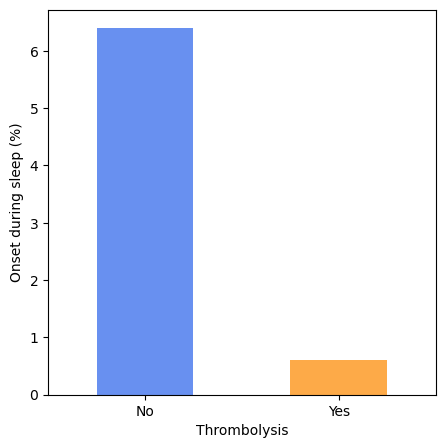

In [16]:
plot_by_thrombolysis(kind='bar_percent',
                     column='onset_during_sleep',
                     label='Onset during sleep (%)')

**Arrive by ambulance** - higher proportion of thrombolysed patients arrive by ambulance

thrombolysis_str
No     89.532689
Yes    92.450004
Name: arrive_by_ambulance, dtype: float64

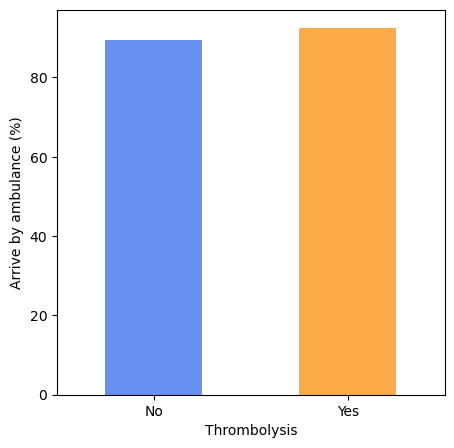

In [17]:
plot_by_thrombolysis(kind='bar_percent',
                     column='arrive_by_ambulance',
                     label='Arrive by ambulance (%)')

**Ambulance times** - on average, thrombolysed patients had a:
* Shorter call to ambulance time
* Shorter ambulance on scene time
* Shorter travel to hospital time
* Shorter wait time at hospital

thrombolysis_str
No     25.175523
Yes    22.698685
Name: call_to_ambulance_arrival_time, dtype: float64

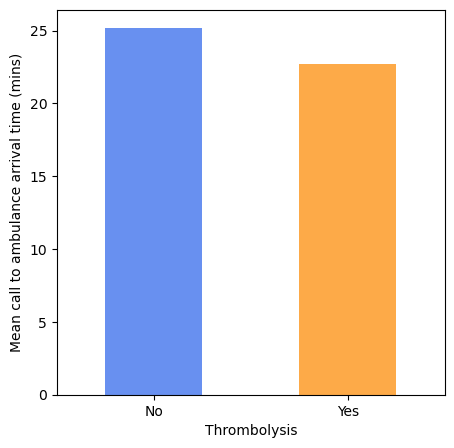

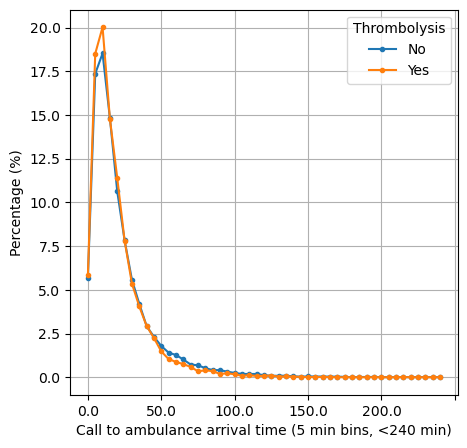

In [18]:
# Create bar plot
plot_by_thrombolysis(
    kind='bar_mean',
    column='call_to_ambulance_arrival_time',
    label='Mean call to ambulance arrival time (mins)')

# Create line plot
plot_by_thrombolysis(
    kind='line',
    column='call_to_ambulance_arrival_time',
    label='Call to ambulance arrival time (5 min bins, <240 min)',
    bins=5,
    max=240)

thrombolysis_str
No     32.341115
Yes    27.369913
Name: ambulance_on_scene_time, dtype: float64

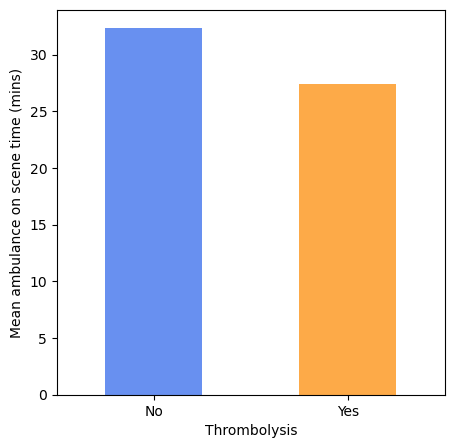

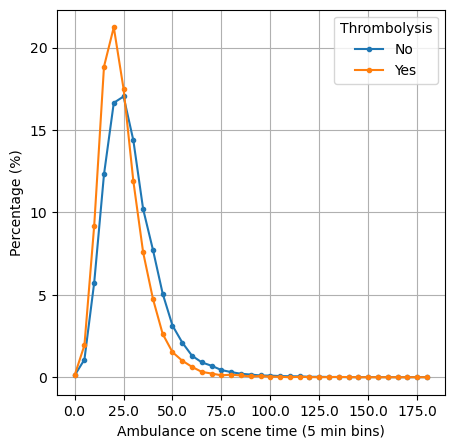

In [19]:
# Create bar plot
plot_by_thrombolysis(
    kind='bar_mean',
    column='ambulance_on_scene_time',
    label='Mean ambulance on scene time (mins)')

# Create line plot
plot_by_thrombolysis(
    kind='line',
    column='ambulance_on_scene_time',
    label='Ambulance on scene time (5 min bins)',
    bins=5)

thrombolysis_str
No     18.041520
Yes    16.666309
Name: ambulance_travel_to_hospital_time, dtype: float64

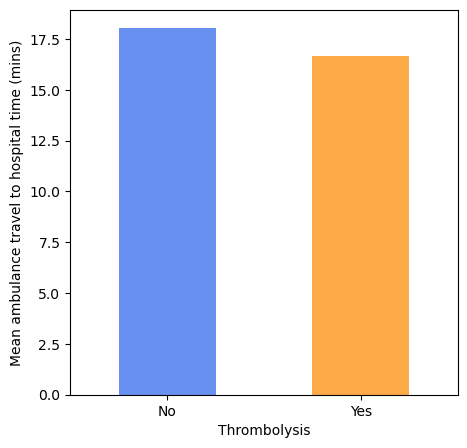

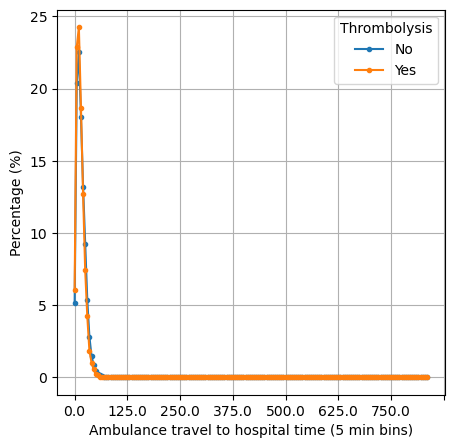

In [20]:
# Create bar plot
plot_by_thrombolysis(
    kind='bar_mean',
    column='ambulance_travel_to_hospital_time',
    label='Mean ambulance travel to hospital time (mins)')

# Create line plot
plot_by_thrombolysis(
    kind='line',
    column='ambulance_travel_to_hospital_time',
    label='Ambulance travel to hospital time (5 min bins)',
    bins=5)

thrombolysis_str
No     45.633291
Yes    78.606475
Name: ambulance_wait_time_at_hospital, dtype: float64

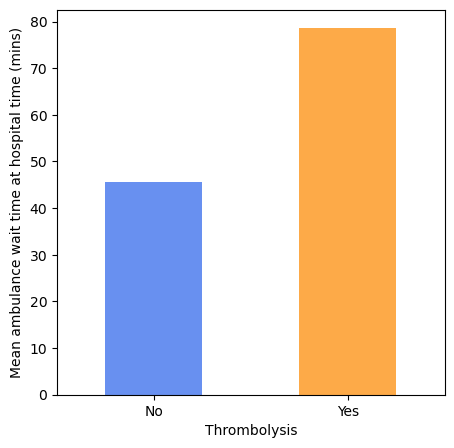

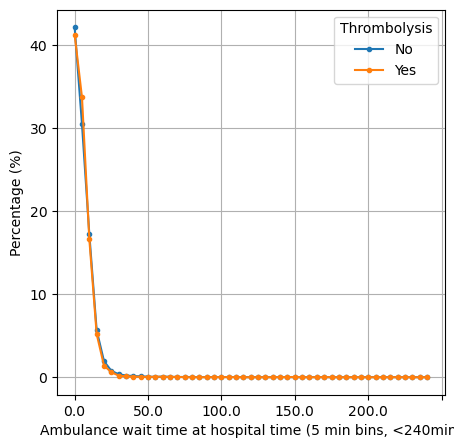

In [21]:
# Create bar plot
plot_by_thrombolysis(
    kind='bar_mean',
    column='ambulance_wait_time_at_hospital',
    label='Mean ambulance wait time at hospital time (mins)')

# Create line plot
plot_by_thrombolysis(
    kind='line',
    column='ambulance_wait_time_at_hospital',
    label='Ambulance wait time at hospital time (5 min bins, <240min)',
    bins=5,
    max=240)

**Arrival time periods** - of all thrombolysed admissions (versus not):
* A higher proportion of thrombolysed patients arrived from 6am - 6pm, and lower from 12am - 6am
* A higher proportion of thrombolysed patients are in the summer and lower in autumn
* A higher proportion are in 2017 to 2019, and lower proportion are in 2020 to 2021

Caveat: Be aware of what you are looking at here - e.g. of all thrombolysed patients, what proportion were in this year/month/time period

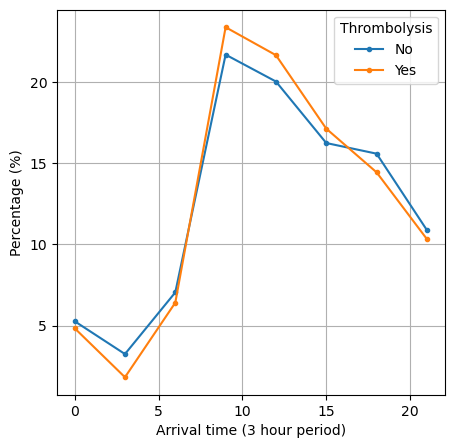

In [22]:
plot_by_thrombolysis(
    kind='line',
    column='arrival_time_3_hour_period',
    label='Arrival time (3 hour period)')

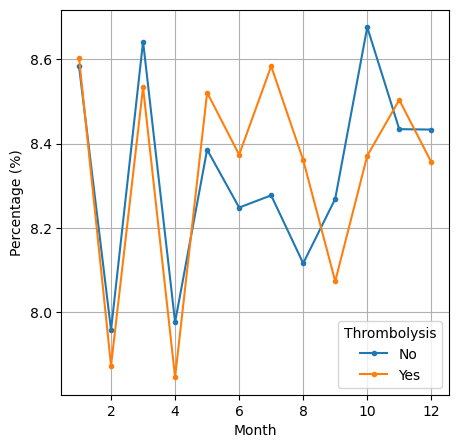

In [23]:
plot_by_thrombolysis(
    kind='line',
    column='month',
    label='Month')

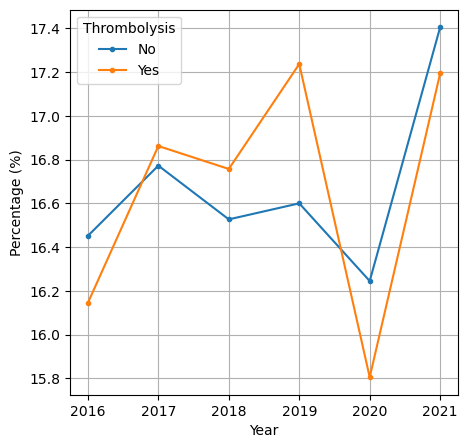

In [24]:
plot_by_thrombolysis(
    kind='line',
    column='year',
    label='Year')

**Thrombectomy** - a higher proportion of thrombolysed patients had thrombectomy

thrombolysis_str
No     1.042655
Yes    6.174011
Name: thrombectomy, dtype: float64

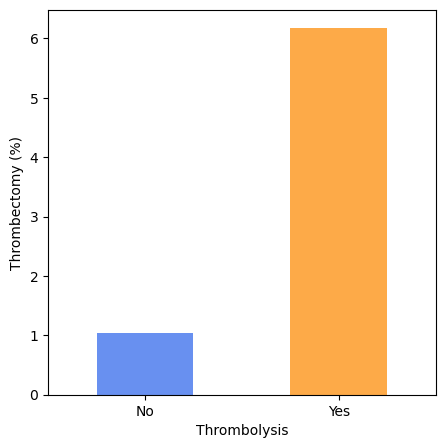

In [25]:
plot_by_thrombolysis(kind='bar_percent',
                     column='thrombectomy',
                     label='Thrombectomy (%)')

**Arrival to thrombectomy time** - on average, thrombolsed patients (who also had thrombectomy) had a shorter arrival to thrombectomy time

thrombolysis_str
No     247.174085
Yes    203.137080
Name: arrival_to_thrombectomy_time, dtype: float64

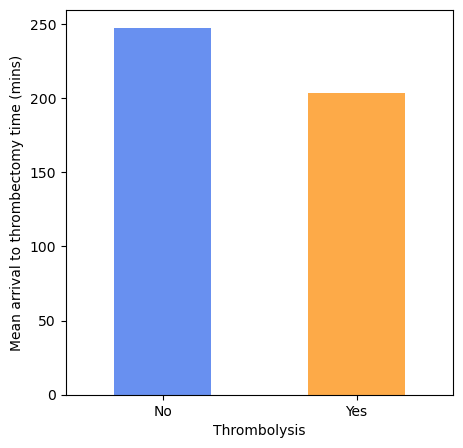

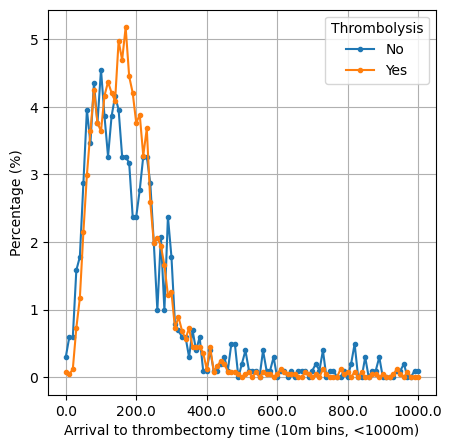

In [26]:
plot_by_thrombolysis(kind='bar_mean',
                     column='arrival_to_thrombectomy_time',
                     label='Mean arrival to thrombectomy time (mins)')

plot_by_thrombolysis(kind='line',
                     column='arrival_to_thrombectomy_time',
                     label='Arrival to thrombectomy time (10m bins, <1000m)',
                     bins=10,
                     max=1000)

**Comorbidities** - on average, thrombolysed patients have - 
* Lower proportion with congestive heart failure
* Lower proportion with hypertension
* Lower proportion with atrial fibrillation
* Lower proportion with diabetes
* Lower proportion with prior stroke or TIA
* Similar proportion on antiplatelets
* Lower proportion on anticoagulants
* Higher proportion with new atrial fibrillation diagnosis 

thrombolysis_str
No     5.319500
Yes    4.111846
Name: congestive_heart_failure, dtype: float64

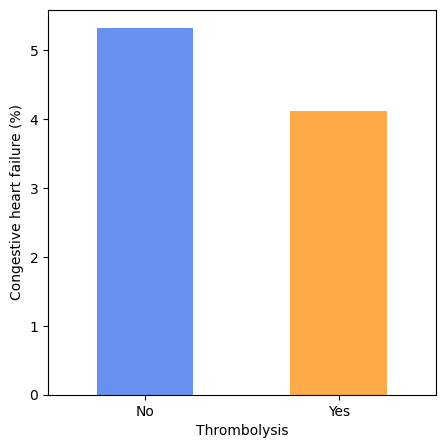

thrombolysis_str
No     54.158244
Yes    51.119710
Name: hypertension, dtype: float64

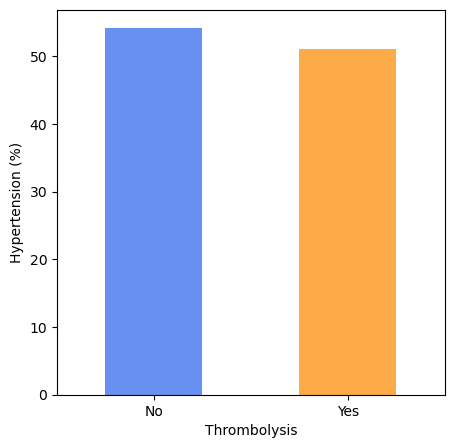

thrombolysis_str
No     23.473660
Yes    11.936088
Name: atrial_fibrillation, dtype: float64

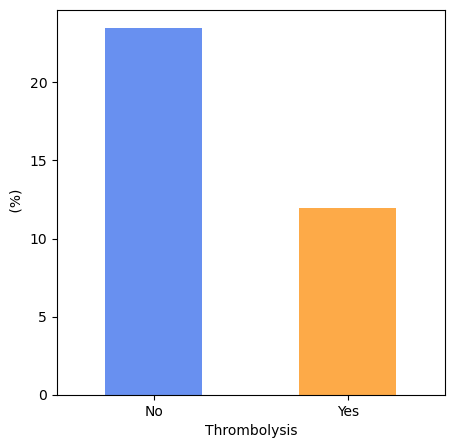

thrombolysis_str
No     19.671218
Yes    17.363625
Name: diabetes, dtype: float64

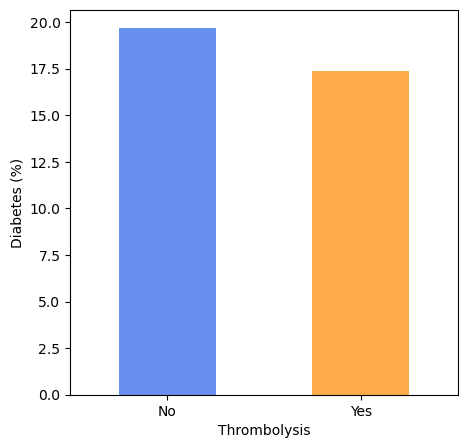

thrombolysis_str
No     29.270657
Yes    20.297091
Name: prior_stroke_tia, dtype: float64

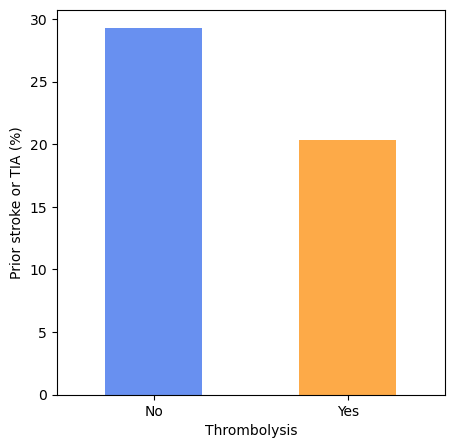

thrombolysis_str
No     3.397137
Yes    2.923480
Name: afib_antiplatelet, dtype: float64

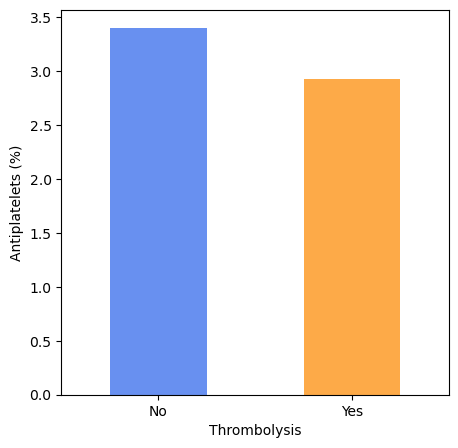

thrombolysis_str
No     23.816034
Yes     4.473990
Name: afib_anticoagulant, dtype: float64

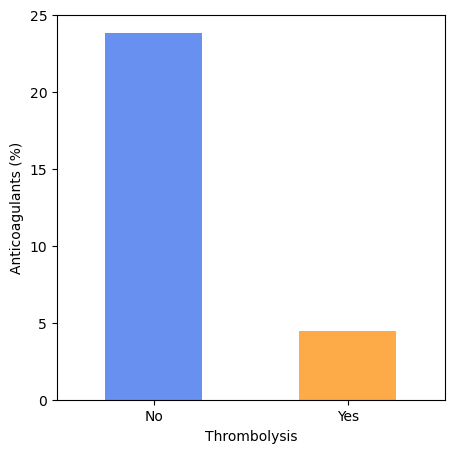

thrombolysis_str
No     3.461078
Yes    0.911247
Name: afib_vit_k_anticoagulant, dtype: float64

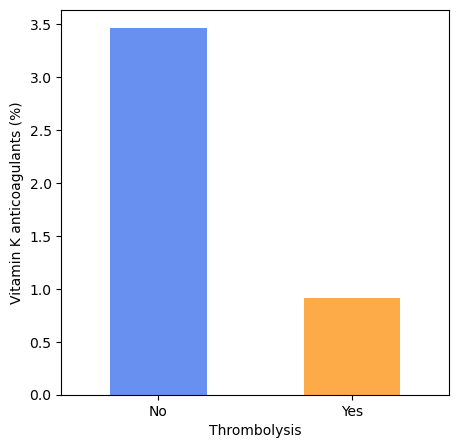

thrombolysis_str
No     9.732478
Yes    1.218325
Name: afib_doac_anticoagulant, dtype: float64

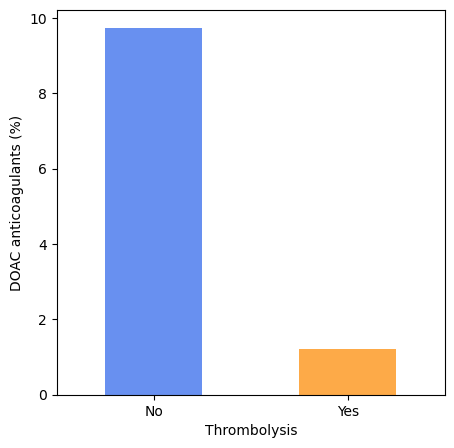

thrombolysis_str
No     0.162947
Yes    0.027462
Name: afib_heparin_anticoagulant, dtype: float64

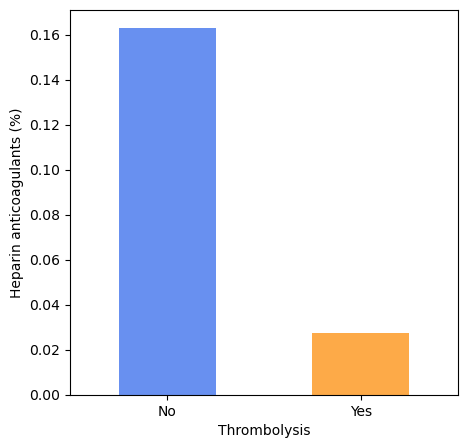

thrombolysis_str
No      6.272777
Yes    10.638029
Name: new_afib_diagnosis, dtype: float64

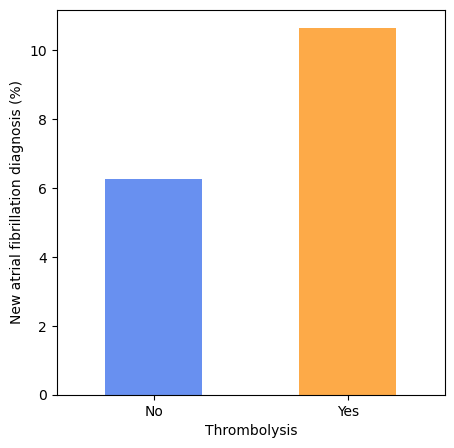

In [27]:
comorbid = {'congestive_heart_failure': 'Congestive heart failure',
            'hypertension': 'Hypertension',
            'atrial_fibrillation': '',
            'diabetes': 'Diabetes',
            'prior_stroke_tia': 'Prior stroke or TIA',
            'afib_antiplatelet': 'Antiplatelets',
            'afib_anticoagulant': 'Anticoagulants',
            'afib_vit_k_anticoagulant': 'Vitamin K anticoagulants',
            'afib_doac_anticoagulant': 'DOAC anticoagulants',
            'afib_heparin_anticoagulant': 'Heparin anticoagulants',
            'new_afib_diagnosis': 'New atrial fibrillation diagnosis'}

for key, value in comorbid.items():
    plot_by_thrombolysis(kind='bar_percent',
                         column=key,
                         label=value+' (%)')

**Prior disability** - on average, thrombolysed patients had a higher prior disability

thrombolysis_str
No     1.184450
Yes    0.710598
Name: prior_disability, dtype: float64

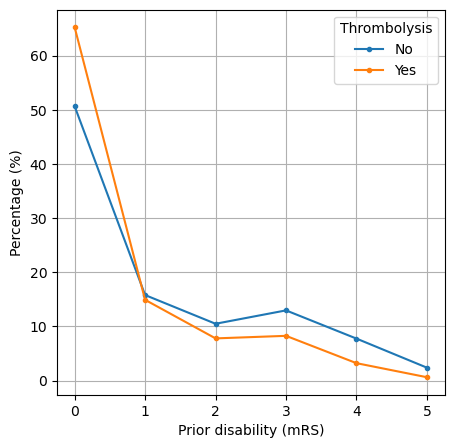

In [28]:
plot_by_thrombolysis(
    kind='line',
    column='prior_disability',
    label='Prior disability (mRS)',
    mean=True)

**Stroke severity** - thrombolysed patients typically had a higher stroke severity (but both have low proportion apx. NIHSS 20+).

Looking at scores on individual parts of NIHSS score, thrombolysed patients typically had - 
* Lower LOC
* Higher LOC questions
* Similar LOC commands
* Higher best faze
* Higher visual
* Higher facial palsy
* Higher motor arm and leg, left and right
* Higher limb ataxia
* Higher sensory
* Higher best language
* Higher extinction inattention

thrombolysis_str
No      8.069964
Yes    10.977131
Name: stroke_severity, dtype: float64

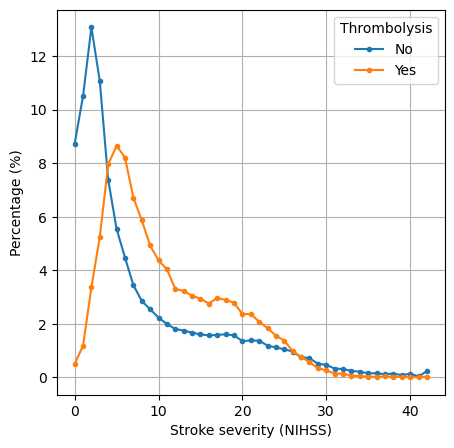

In [29]:
plot_by_thrombolysis(
    kind='line',
    column='stroke_severity',
    label='Stroke severity (NIHSS)',
    mean=True)

thrombolysis_str
No     0.302710
Yes    0.190937
Name: nihss_arrival_loc, dtype: float64

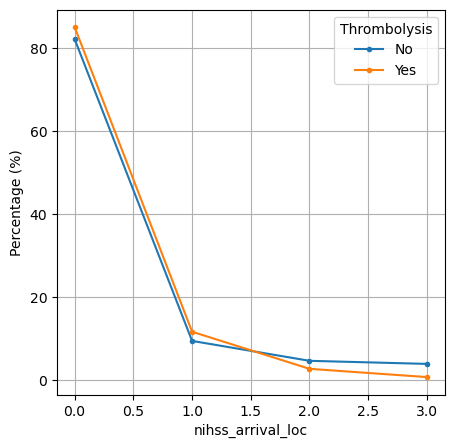

thrombolysis_str
No     0.615776
Yes    0.770140
Name: nihss_arrival_loc_questions, dtype: float64

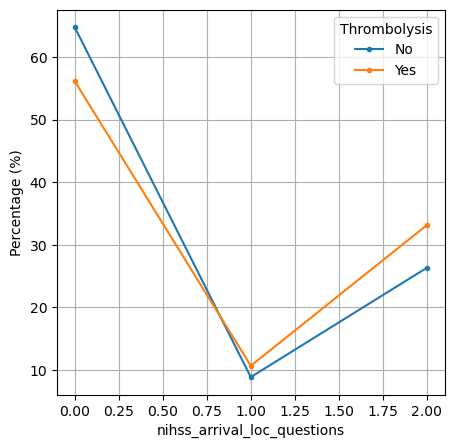

thrombolysis_str
No     0.359114
Yes    0.382198
Name: nihss_arrival_loc_commands, dtype: float64

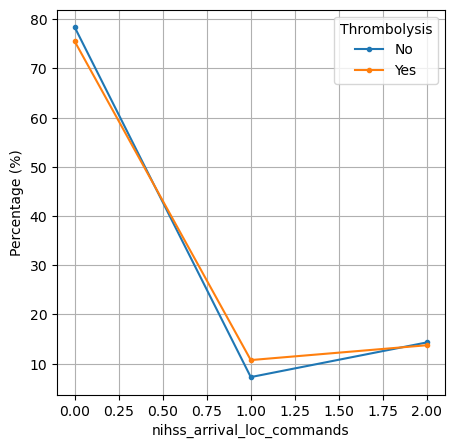

thrombolysis_str
No     0.305096
Yes    0.436640
Name: nihss_arrival_best_gaze, dtype: float64

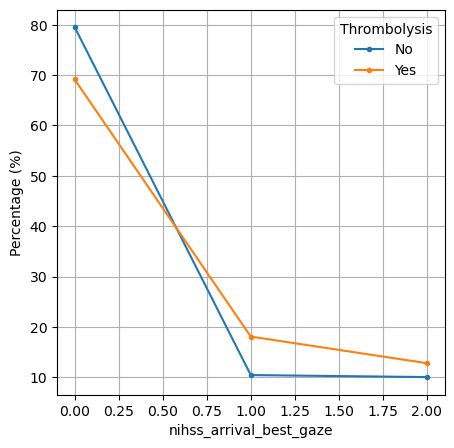

thrombolysis_str
No     0.429882
Yes    0.639162
Name: nihss_arrival_visual, dtype: float64

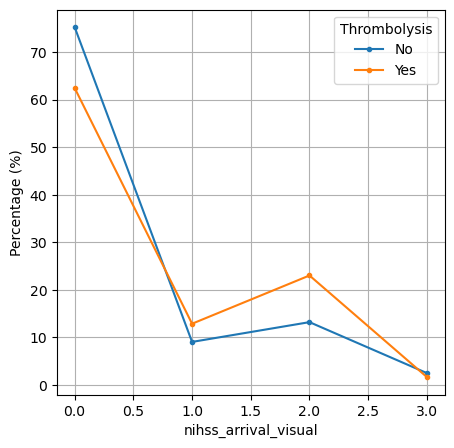

thrombolysis_str
No     0.736436
Yes    1.128452
Name: nihss_arrival_facial_palsy, dtype: float64

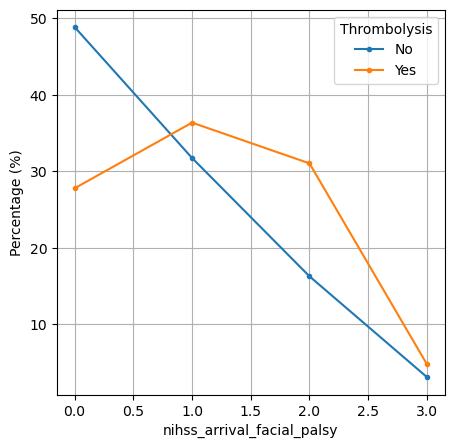

thrombolysis_str
No     0.775844
Yes    1.003481
Name: nihss_arrival_motor_arm_left, dtype: float64

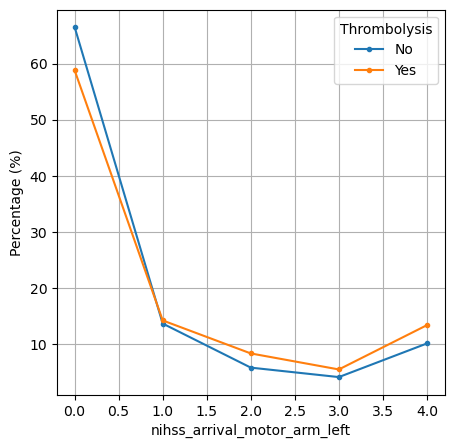

thrombolysis_str
No     0.725875
Yes    0.970802
Name: nihss_arrival_motor_arm_right, dtype: float64

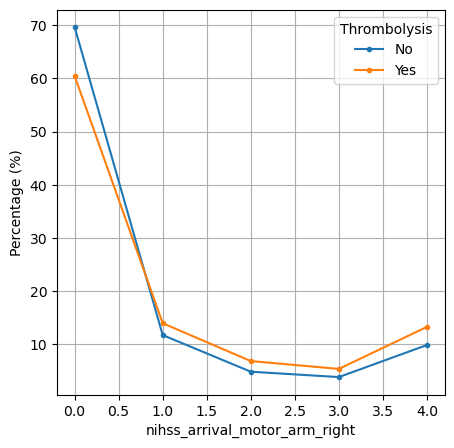

thrombolysis_str
No     0.797879
Yes    0.985318
Name: nihss_arrival_motor_leg_left, dtype: float64

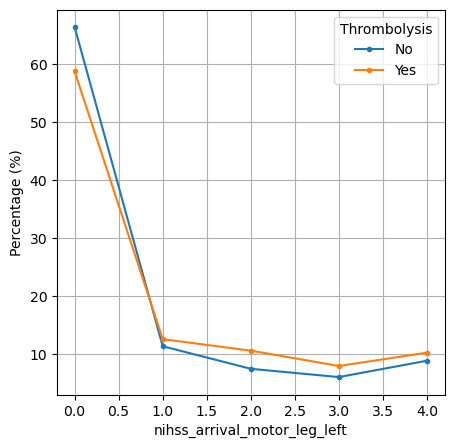

thrombolysis_str
No     0.754818
Yes    0.955689
Name: nihss_arrival_motor_leg_right, dtype: float64

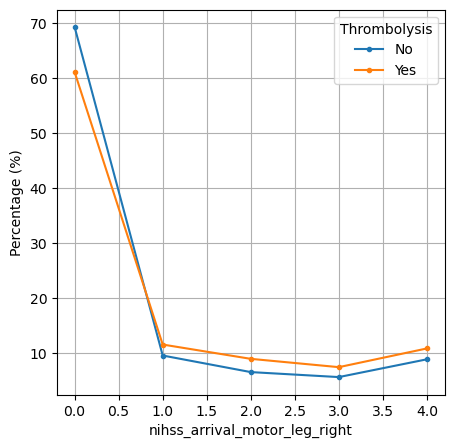

thrombolysis_str
No     0.244842
Yes    0.310037
Name: nihss_arrival_limb_ataxia, dtype: float64

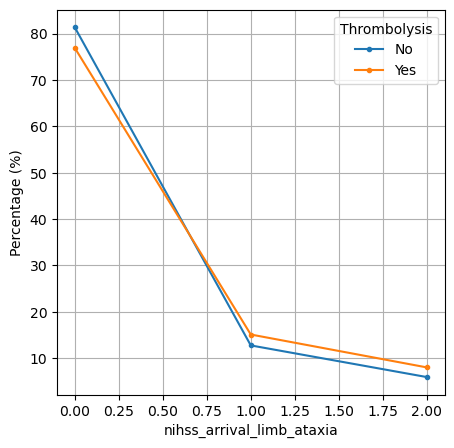

thrombolysis_str
No     0.453795
Yes    0.667965
Name: nihss_arrival_sensory, dtype: float64

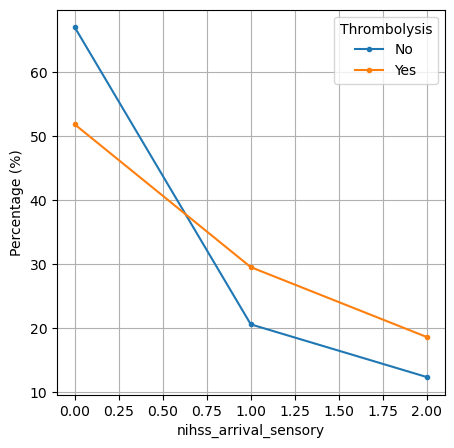

thrombolysis_str
No     0.738642
Yes    1.038526
Name: nihss_arrival_best_language, dtype: float64

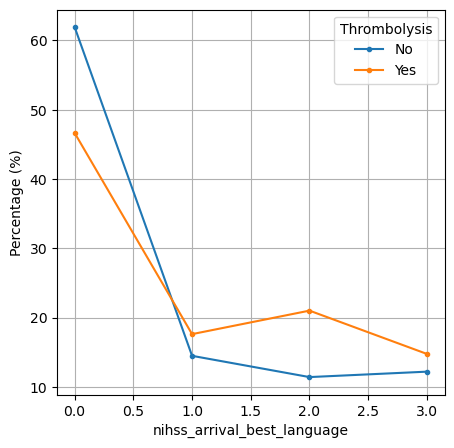

thrombolysis_str
No     0.657184
Yes    0.917604
Name: nihss_arrival_dysarthria, dtype: float64

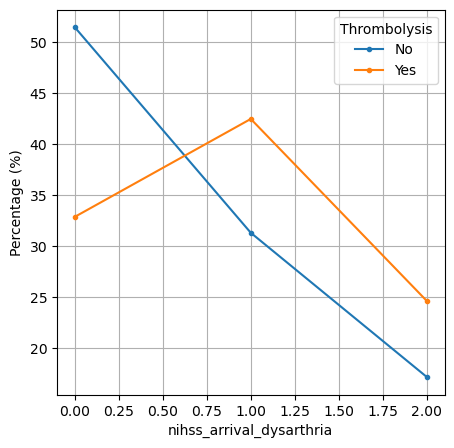

thrombolysis_str
No     0.405027
Yes    0.642748
Name: nihss_arrival_extinction_inattention, dtype: float64

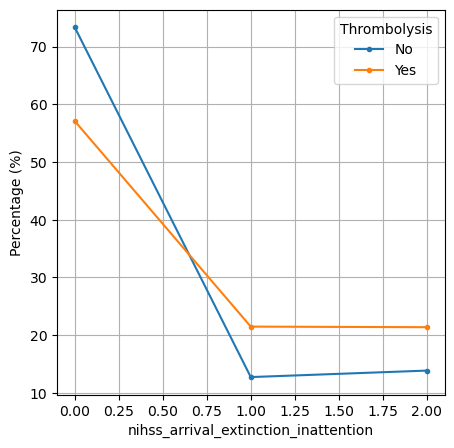

In [30]:
# Create list of NIHSS columns and loop through them
nihss_col = [col for col in data if
             col.startswith('nihss') & (col != 'nihss_complete')]
for col in nihss_col:
    plot_by_thrombolysis(
        kind='line',
        column=col,
        label=col,
        mean=True)

**Death** - lower proportion of thrombolysed patients died

thrombolysis_str
No     18.714355
Yes    13.432538
Name: death, dtype: float64

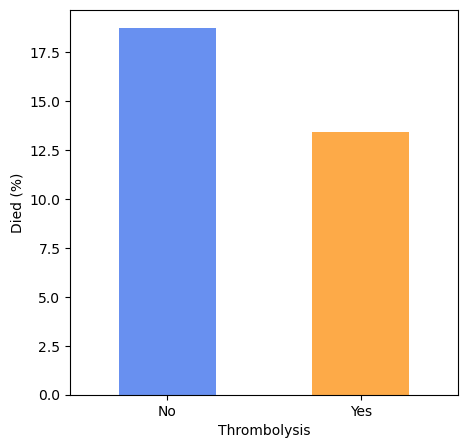

In [31]:
plot_by_thrombolysis(kind='bar_percent',
                     column='death',
                     label='Died (%)')

**Discharge disability** - on average, thrombolysed patients had a lower discharge disability

thrombolysis_str
No     2.915759
Yes    2.553266
Name: discharge_disability, dtype: float64

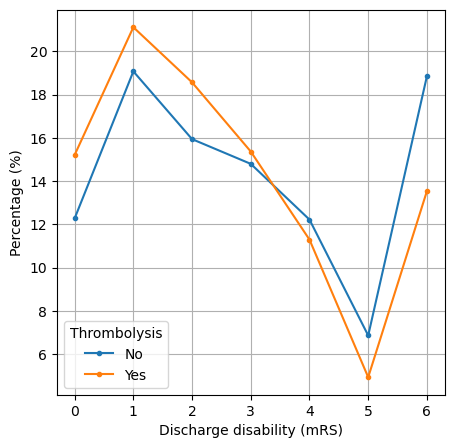

In [32]:
plot_by_thrombolysis(kind='line',
                     column='discharge_disability',
                     label='Discharge disability (mRS)',
                     mean=True)

**Six month disability** - on average, thrombolysed patients had a lower disability at 6-month follow-up

thrombolysis_str
No     2.311418
Yes    1.996170
Name: disability_6_month, dtype: float64

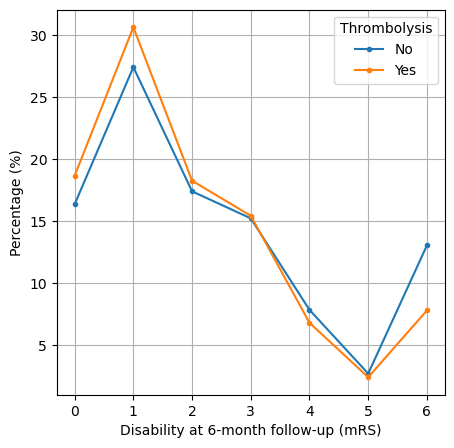

In [33]:
plot_by_thrombolysis(kind='line',
                     column='disability_6_month',
                     label='Disability at 6-month follow-up (mRS)',
                     mean=True)